## Digital Filters

In contrast to FIR filters, Infinite Impulse Response (FIR) filters always require feedback. Output samples in a FIR filter depend on the previous input samples, whereas each IIR ouput sample depends on previous input samples and previous output samples, i.e. it contains a feedback loop that under certain conditions sucha as perturbation could coase instability, and infinite oscillations, hence the 'Infinite' part in the IIR.

However, IIR filters, although with caveats, are more efficient than FIR, hence better suited for real time applications.

To illustrate how IIR filters work, let us start by reviewing an FIR filter. The output of a 4-coefficient FIR filter is given by the following difference (recurrence) equation:

$$ y[n] = h[0]x[n] + h[1]x[n-1] + h[2]x[n-2] + h[3]x[n-3] $$

In constrast an IIR filter could be thought of as the combination of an FIR component, where its output is the input to the second part, with a second 'inverted' FIR with the final output in the position of the FIR input, but this is better illustrated with the aid of the diagram provided in classes, which is identical to the following equation:

\begin{align}
y[n] &= b[0]x[n] + b[1]x[n-1] + b[2]x[n-2] + b[3]x[n-3] \\
     &  + a[1]y[n-1] + a[2]y[n-2] + a[3]y[n-3] 
\end{align}

Now, the tricky bit with IIR filters is that in contrast to FIR filters, designing them cannot be just carried out by obtaining the desired impulse response sequence, where the $h[k]$ taps or coefficients are exactly the filter impulse response.


#### Z-Transform


In the case of the IIR filters, it is common to use the discrete-time relative of the Laplace transform, i.e. the z-transform. In this sense, the z-transform facilitates the analysis of discrete difference equations.
The z-transform of a discrete sequence h[n] is given by:

$$ H[z] = \sum_{n=-\infty}^{\infty} h[n]\; z^{-n}$$

with $z$ a complex variable. 

It is possible to determine an IIR filter frequency response from H(z), the IIR filter's  z-domain transfer function, as well as its stability from the poles and zeroes locations.

Let us star by expressing z in polar form $z=re^{jw}$, then:

$$H[z] = H[re^{jw}] = \sum_{n=-\infty}^{\infty} h[n]\; (re^{jw})^{-n} =  \sum_{n=-\infty}^{\infty} h[n]\; r^{-n}(e^{-jwn}) $$

Take a moment to analyse the previous equation, does it look familiar?
What happens when r = 1?

Then, if h[n] represents a filter impulse response sequence, evaluating H[z] for |z|=1 leads to the frequency response of the filter.  |z|=1 is a unit circle centred around z=0.

In order to avoid instabilities, any IIR filter should have a transfer function H[z] with all of its poles inside the unit circle.



#### IIR filter

Let us start by stating that the time domain difference equation of an Mth order IIR filter, wiht N feedforward stages and M feedback stages is:

\begin{align}
y[n] &= b[0]x[n] + b[1]x[n-1] + b[2]x[n-2] + b[3]x[n-3] + ... + b[N]x[n-N]\\
     &  + a[1]y[n-1] + a[2]y[n-2] + a[3]y[n-3] + ... + a[M]y[n-M]
\end{align}

Or in z-domain:

\begin{align}
y[n] &= b[0]X[z] + b[1]X[z]z^{-1} + b[2]X[z]z^{-2} + b[3]X[z]z^{-3} + ... + b[N]X[z]z^{-N}\\
     &  + a[1]Y[z]z^{-1} + a[2]Y[z]z^{-2} + a[3]Y[z]z^{-3} + ... + a[M]Y[z]z^{-M}
\end{align}

Or more compactly,

$$Y[z] = X[x]\sum_{k=0}^{N}b[k]z^{-k} + Y[z]\sum_{k=1}^M a[k]z^{-k}$$

Rearranging:
$$Y[z][1 - \sum_{k=1}^M a[k]z^{-k}] = X[x]\sum_{k=0}^{N}b[k]z^{-k} $$

Then, the filter's z-domain transfer function is given by:
$$ H[z] = \frac{Y[z]}{X[z]} = \frac{\sum_{k=0}^{N}b[k]z^{-k}}{1 - \sum_{k=1}^M a[k]z^{-k}}$$

The largest exponential determines the order of the filter.

### Designing a filter

##### Import libraries

In [1]:
import numpy as np
from numpy import pi, cos, sin, convolve
from scipy.fftpack import fft, ifft, fftshift
from scipy.signal import butter, sosfiltfilt
import matplotlib.pyplot as plt


#The following lines only apply if you have JupyterThemes installed
from jupyterthemes import jtplot
jtplot.style()

In [2]:
# Helper functions
plots = lambda rows = 1, cols = 1, figsize=(20,10): plt.subplots(rows, cols, figsize=figsize)

#create plot
def plot_(ys, x=None, colours=None, markersize=10):
    f, ax = plots(1)
    y = ys[0]
    if not x: x = np.arange(len(y))
        
#     if not colours: colours = 
        
    for i,y in enumerate(ys):
        ax.plot(x, y, colours[i], markersize = markersize)
        ax.plot(x, y, colours[i][0])
    plt.show()
    return f, ax

def plot_fft(Y, colours=None, markersize=10):
    f, ax = plots()
    ax.plot(np.arange(-len(Y)//2, len(Y)//2), fftshift(abs(Y)), 'bo')
    plt.show()
    return f, ax

In [3]:
# Let us create a sample signal
fs = 1000
ts = 1/fs
total_time = 1
f0 = 10
total_samples = fs
N = np.arange(total_samples)
y = sin(2*pi*f0*N*ts)

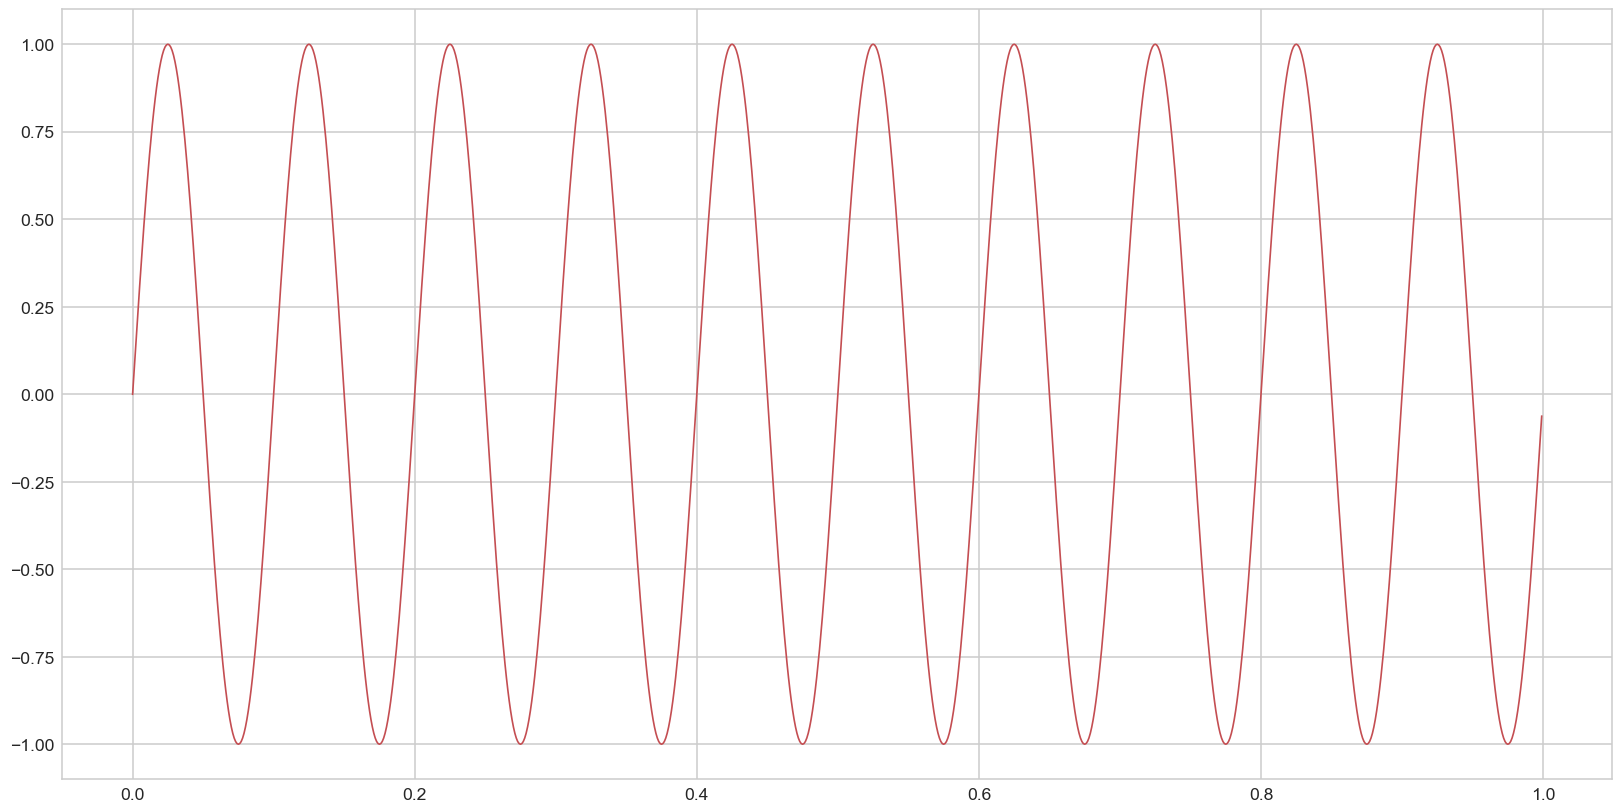

In [4]:
f, ax = plots()
ax.plot(N*ts, y, 'r')
plt.show()

In [5]:
# Adding some noise

In [6]:
n_f = 300
n_f2 = 400
noise = 0.2*sin(2*pi*n_f2*N*ts) + 0.3*sin(2*pi*n_f*N*ts)
y_n = y + noise

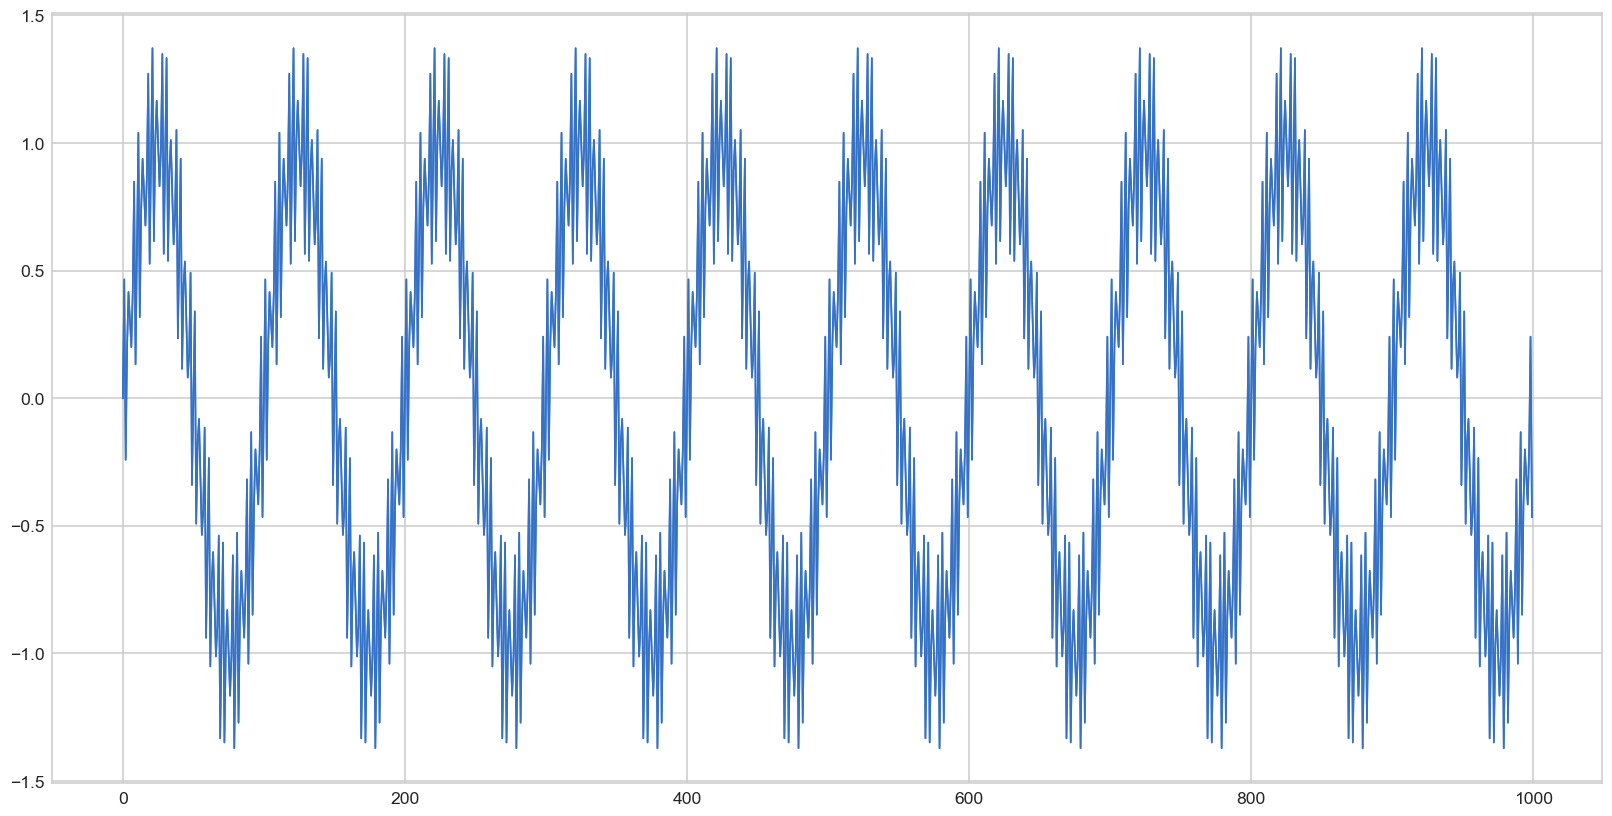

In [7]:
f, ax = plot_([y_n], colours=['b'])

#### How to remove the noise

In this case, we know what the noise frequencies are. However, under usual problems, we would not know these frequencies and would have to find them. How? Take a moment to think about this.

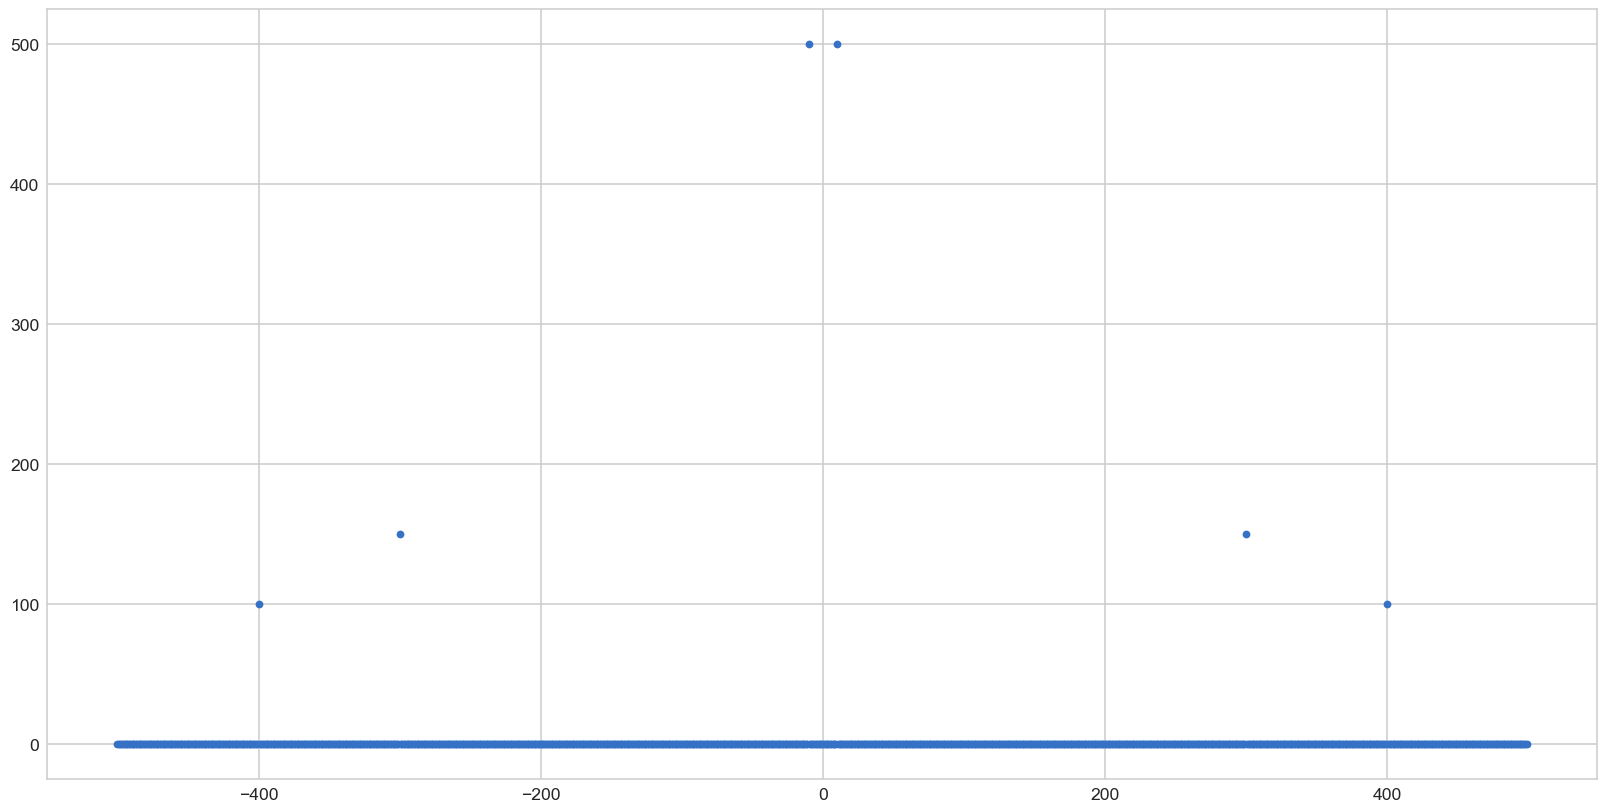

In [8]:
# Let us find the desired frequencies
Y = fft(y_n)
f, ax = plot_fft(Y)

Here, we can see that the noisy frequencies are over 200 Hz, hence we can create our filter accordingly. Let us use two techniques to create our filter. Firstly, do we remember the convolution theorem?

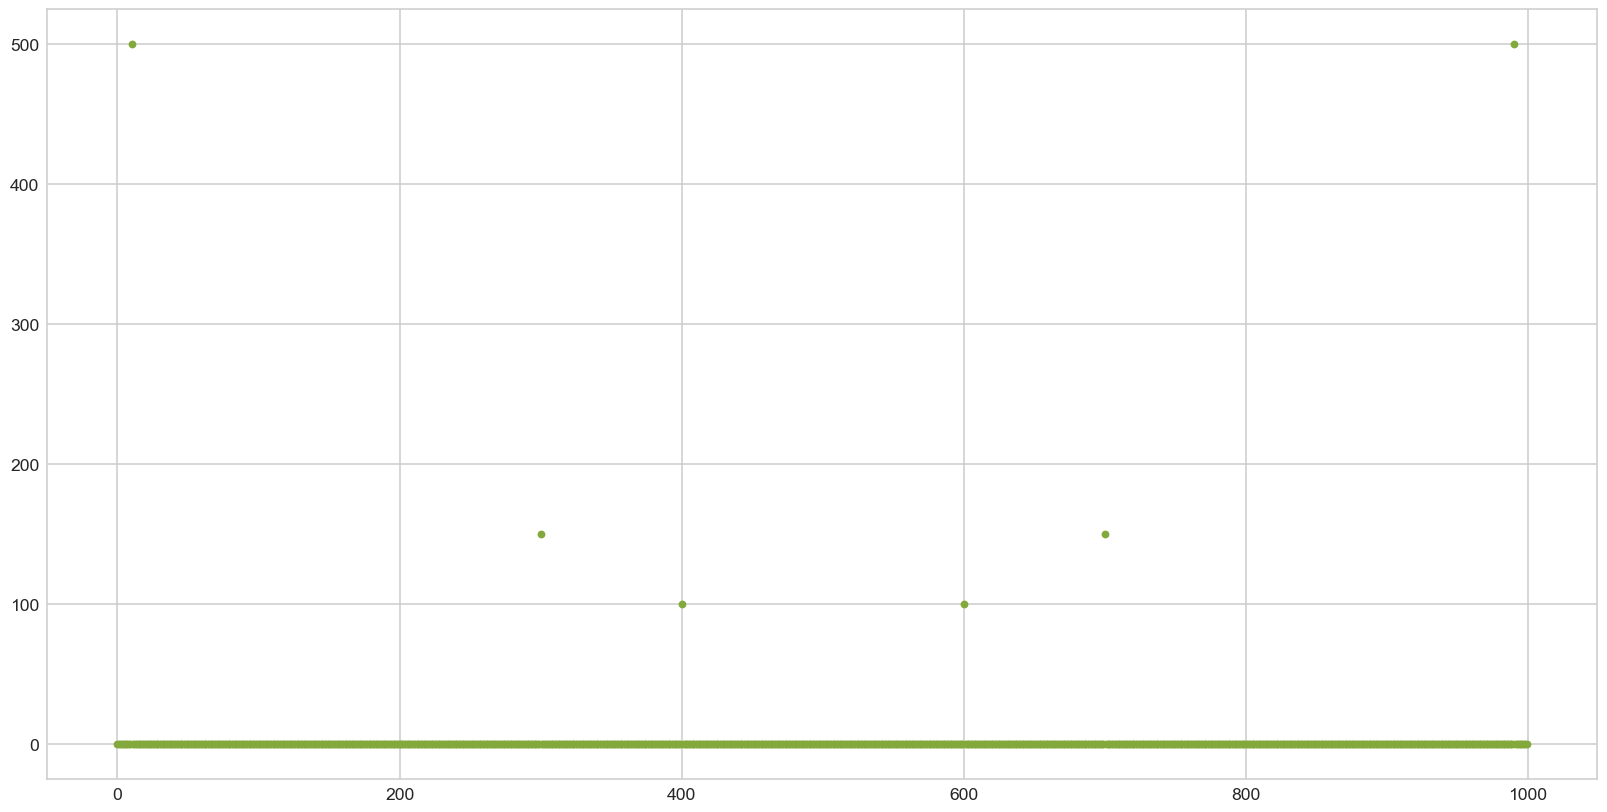

In [9]:
# recall that the signal Y has been shifted in the plot
f, ax = plots()
ax.plot(abs(Y), 'go')
plt.show()

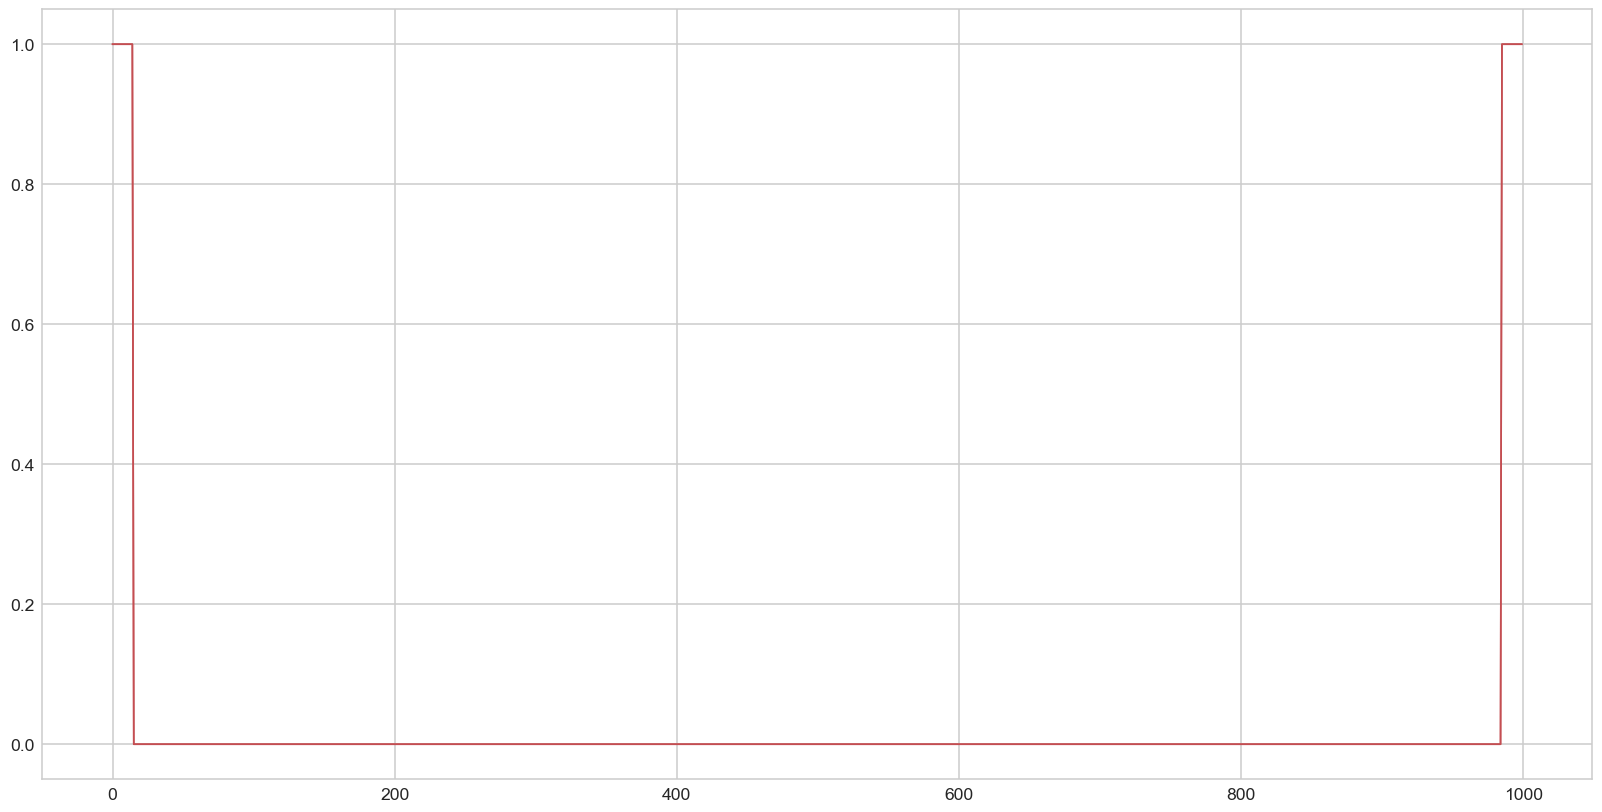

In [10]:
# Let us define a filter in frequency domain
filt_1 = np.ones_like(y)
filt_1[15:985] = 0
_, _ = plot_([filt_1], colours=['r'])

In [11]:
#Let us apply the filter in the frequency domain
Y_filt = Y * filt_1

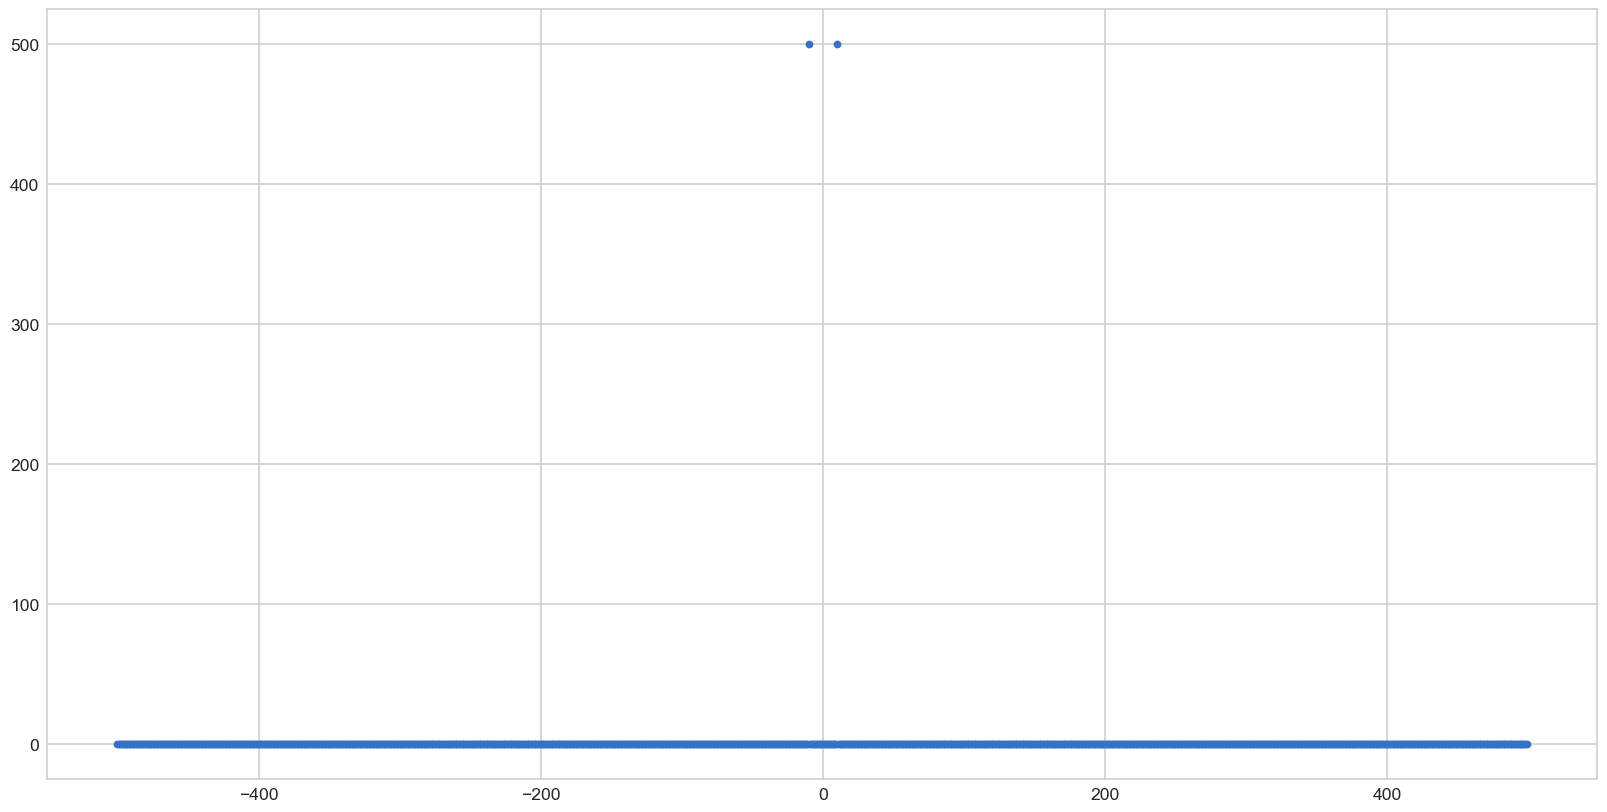

In [12]:
_, _ = plot_fft(Y_filt)

Let's recover the signal

In [13]:
y_filt = ifft(Y_filt)

In [14]:
np.real(y_filt[:10])

array([-3.07720256e-15,  6.27905195e-02,  1.25333234e-01,  1.87381315e-01,
        2.48689887e-01,  3.09016994e-01,  3.68124553e-01,  4.25779292e-01,
        4.81753674e-01,  5.35826795e-01])

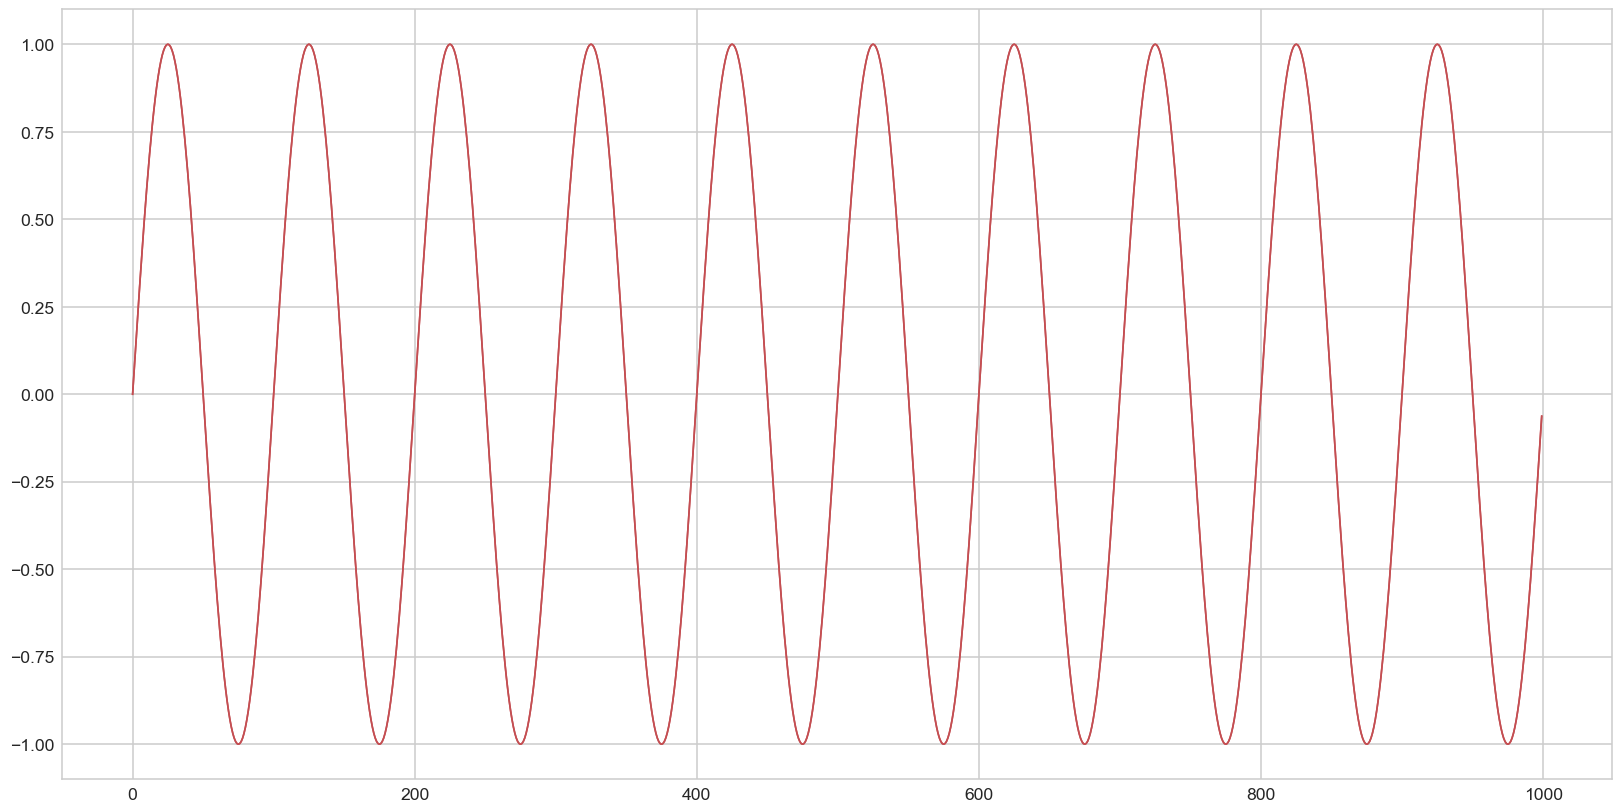

In [15]:
#is it the expected outcome?
_, _ = plot_([np.real(y_filt)], colours=['r'])

Question 1: Describe the previous process to filter the signal with your own words, please try to be succint.

Answer: The first thing was obtining the result of the FFT which we use to comprehend more about the noice in the signal, using that information the design of the filter was more alike finding the frecuencies that obstruct the signal. And we used plt_fft for plotting amplitude vs signal. 

Question 2: Why do we use ```np.real()``` in the previous cell? 

Answer: After dooing all the filtering the np.real funciont returns the real values of the singal because the imaginary values cant be plotted 

Now, we could also use a convolution.

In [16]:
filt_2 = ifft(filt_1)

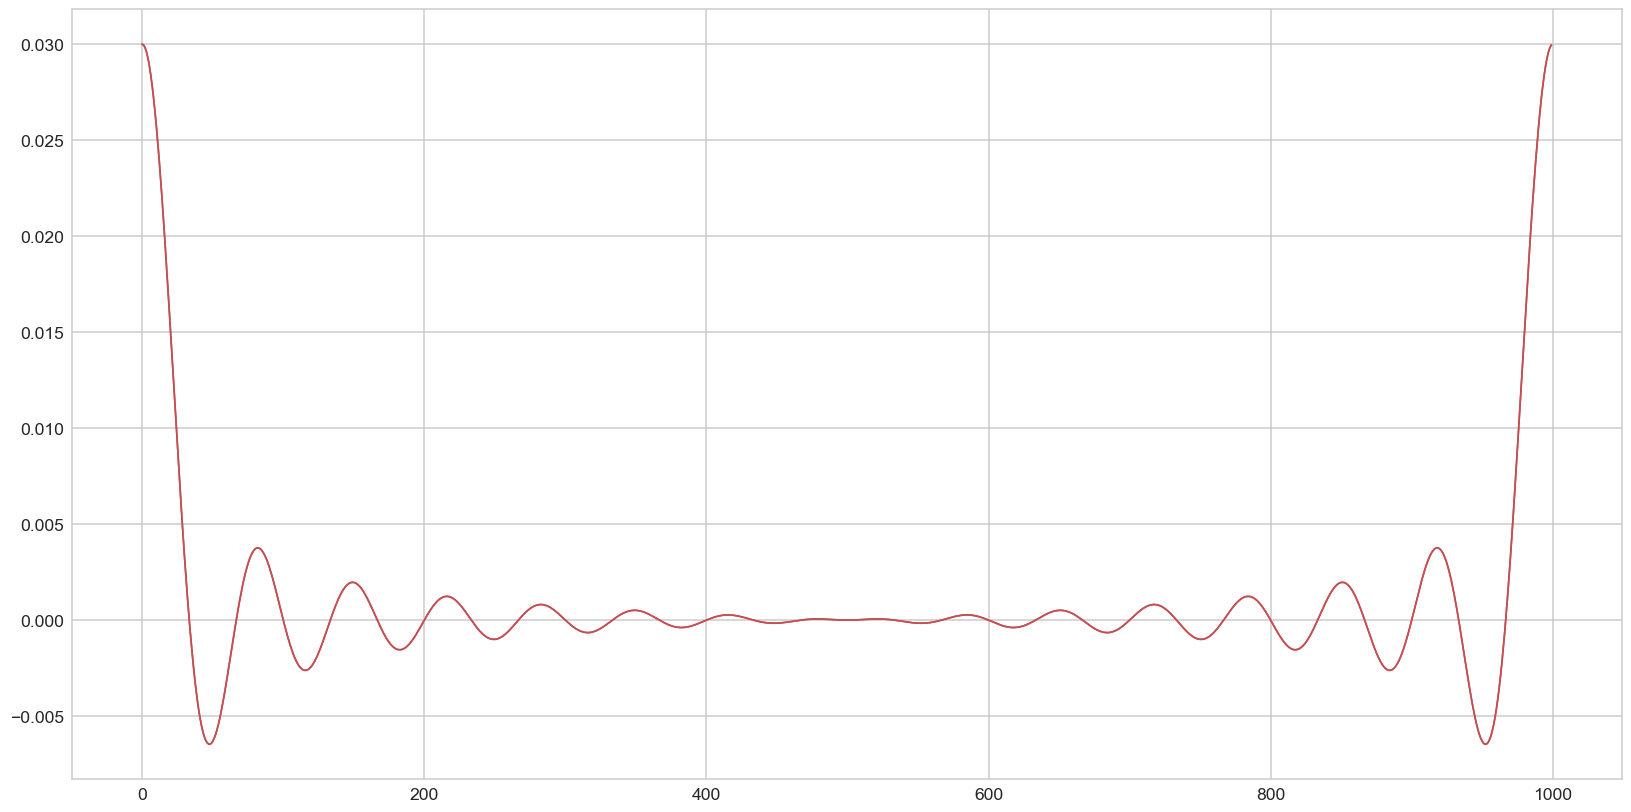

In [17]:
_,_ = plot_([np.real(filt_2)], colours=['r'])

In [18]:
y_filt_2 = convolve(y_n, np.real(fftshift(filt_2)), mode='same')

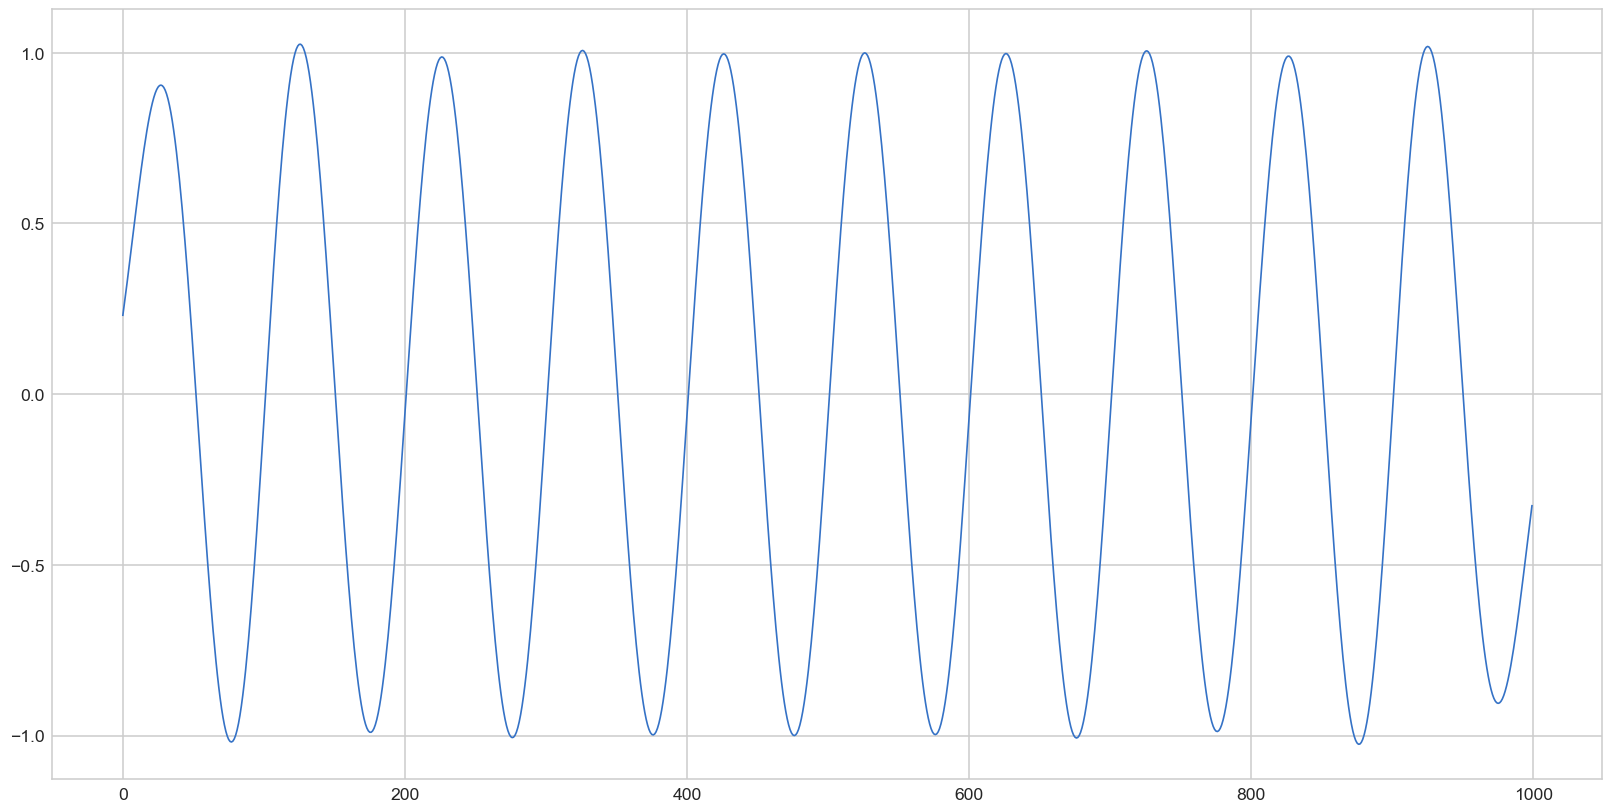

In [19]:
_, ax = plots()
ax.plot((y_filt_2))
plt.show()

Question 3: Describe what just happened during the previous process? Compare the last result to that obtained before Question 1

Answer: You first used the inverse FFT for getting the parameters of the filter (using the previous filter), after you use convolution to obtain the magnitude of the y_n and the filter therefore removing the parts that arent similar 

What I can observe in this method is that even if it requires less for cofing it has some differences compared to the signal we aim to obtain. For example the amplitude variates from 0.01+ 0.15 - compared to the other method. So we use less coding but it doesnt have the same presition 

#### Using the Python Scipy signal library

Of course, the previous activities were performed for academic purposes, we could simply use the Scipy Signal library to apply a Butterworth IIR filter.

In [20]:
f__ = butter(N=2, Wn=20, btype='lowpass', fs=fs, output='sos')

In [21]:
# Apply filter
y_filt_3 = sosfiltfilt(f__, y_n)

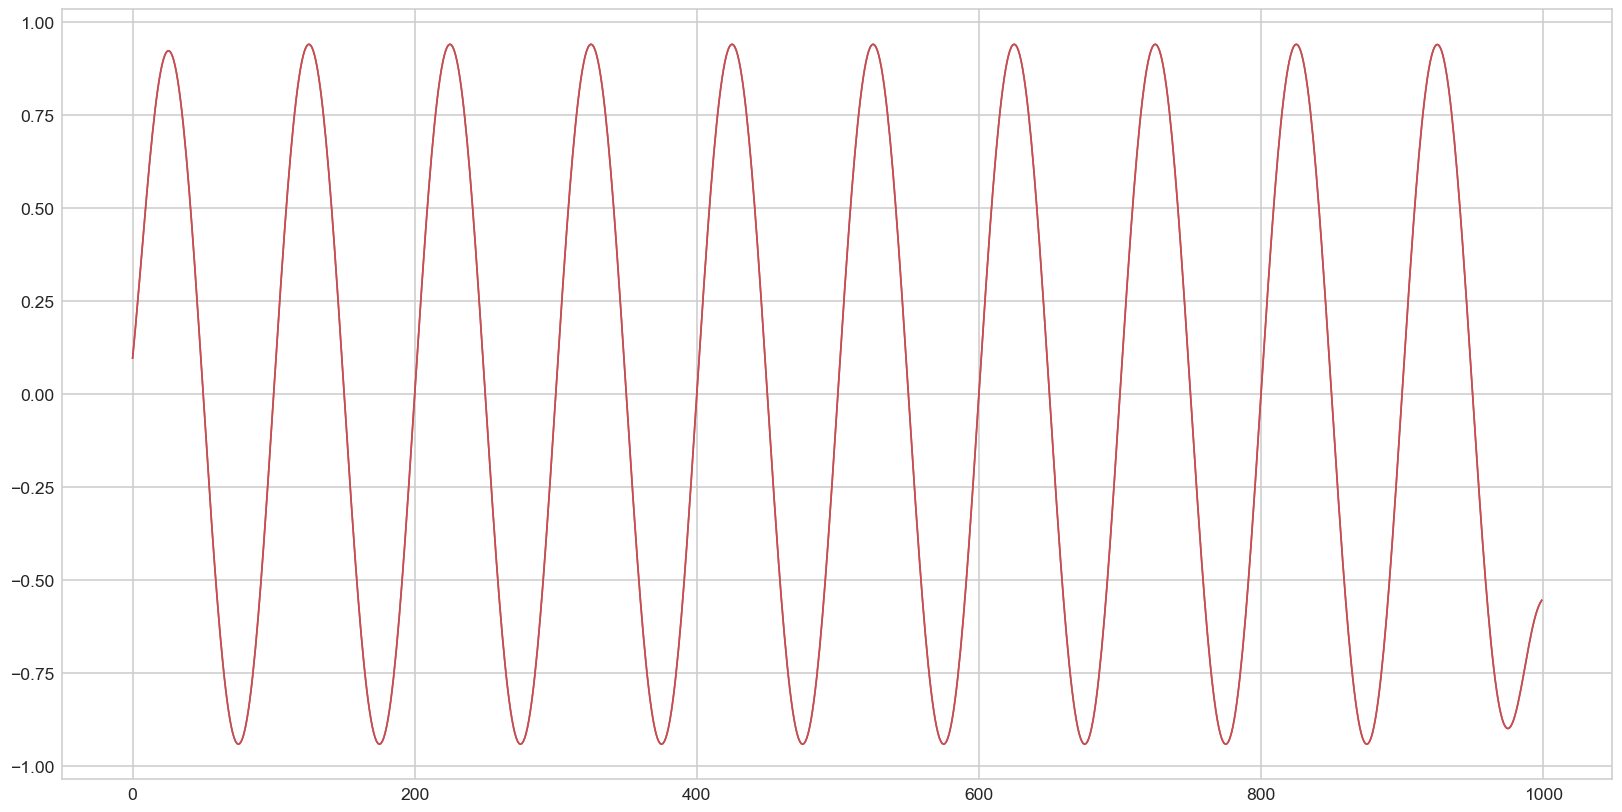

In [22]:
f, ax = plot_([y_filt_3], colours=['r'])

### Remove the hissing noise

In this part of the activity you will test an audio signal, and try to remove the hissing noise. It is important to note that given that noise is destructive, it is not a simple task to fully recover the original signal, particularlly using basic algorithms such as in this activity. Nonetheless, it is a good excercise to validate your knowledge about filters. If you listen to the noisy sound, please lower down the volume of you headphones or computer.

In [23]:
# Additional libraries for working with audio files
from scipy.io import wavfile
from scipy.io.wavfile import write

In [26]:
# Read the wav file
fs, data = wavfile.read('dsp_4.wav')

NameError: name 'data_filt' is not defined

Carry out all the operations you consider necessary to eliminate the hissing noise from the original audio, as mentioned before it may not be possible to recover the audio fully.

In order to write a new filtered .wav file you may follow this example:

```write('recovered.wav', fs, data_filt[:].astype(np.int16))```

Question 4: What frequencies did you try to remove?
Answer:

Question 5: Explain your process to analyse and eliminate the hissing sound.
Answer: First you need to identify the range of the frecuencies you are working with, therefore using FFT and design a filter, after you use the data to design the parameters of the filter, apply the filter to the frecuency doomain and finally using the ifft to change the filter results back into a signal that will only be represented by the real values 